In [42]:
# Linear Regression Model

#Spress Warnings
import warnings
warnings.filterwarnings('ignore')

In [43]:
#importing librares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
# importing dataset
data=pd.DataFrame(pd.read_csv('Housing_price.csv'))


In [45]:
#visualizing dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [46]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [48]:
data.shape

(545, 13)

In [49]:
# data cleaning

data.isnull().sum()==0

# no null values in the dataset

price               True
area                True
bedrooms            True
bathrooms           True
stories             True
mainroad            True
guestroom           True
basement            True
hotwaterheating     True
airconditioning     True
parking             True
prefarea            True
furnishingstatus    True
dtype: bool

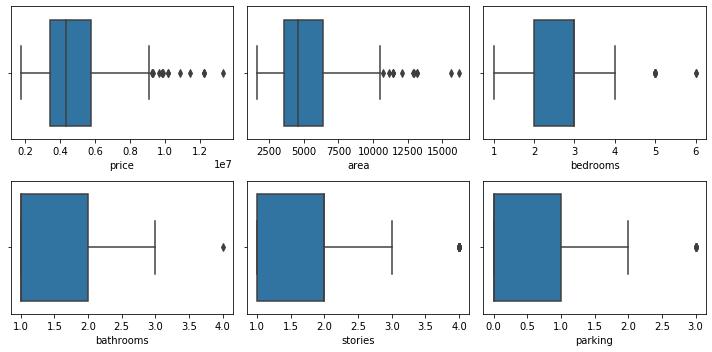

In [50]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

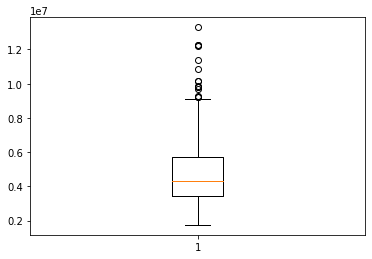

In [51]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.

# outlier treatment for price

plt.boxplot(data.price)
Q1=data.price.quantile(0.25)
Q3=data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]


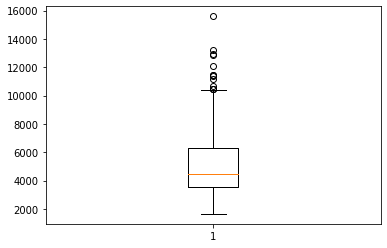

In [52]:
# outlier treatment for area
plt.boxplot(data.area)
Q1=data.area.quantile(0.25)
Q3=data.area.quantile(0.75)
IQR=Q3-Q1
data=data[(data.area >=Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]


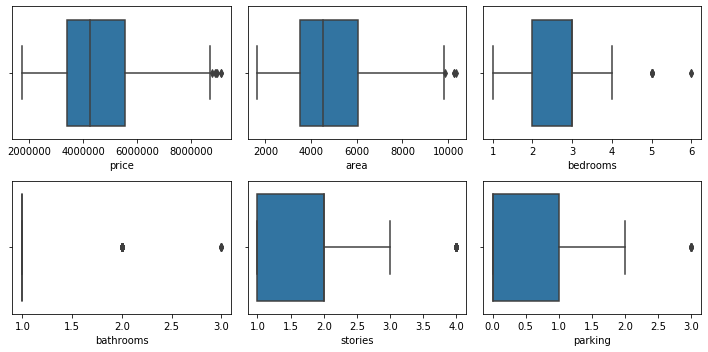

In [53]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

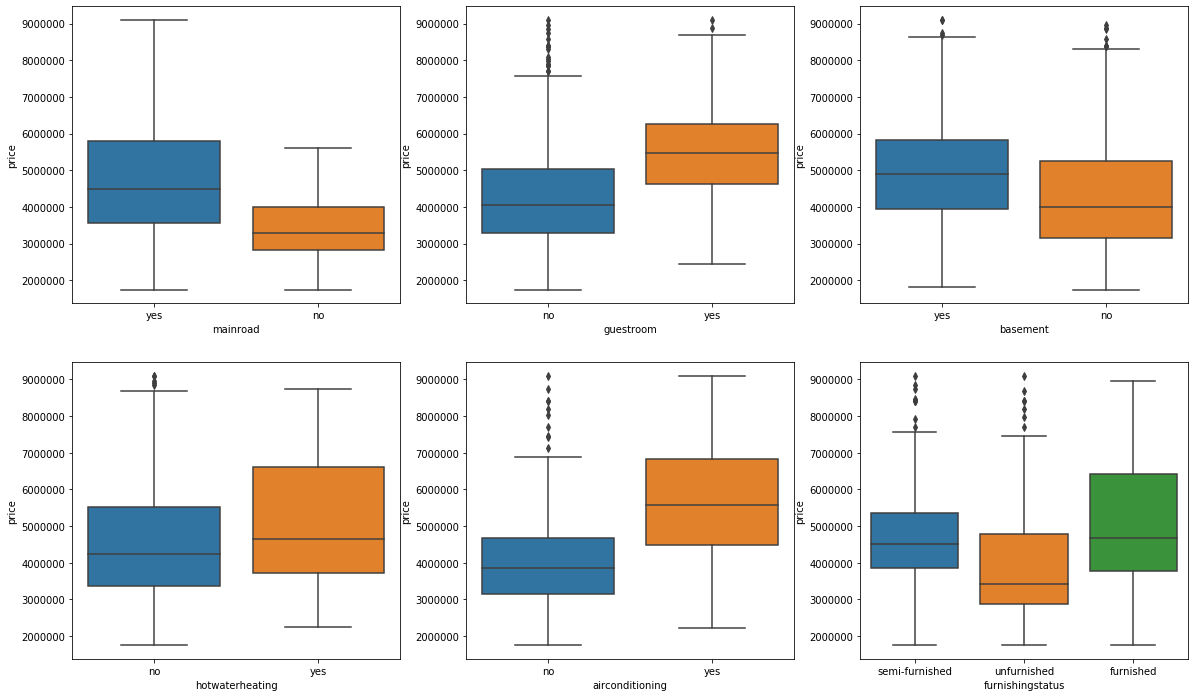

In [54]:
#Visualising Categorical Variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = data)
plt.show()

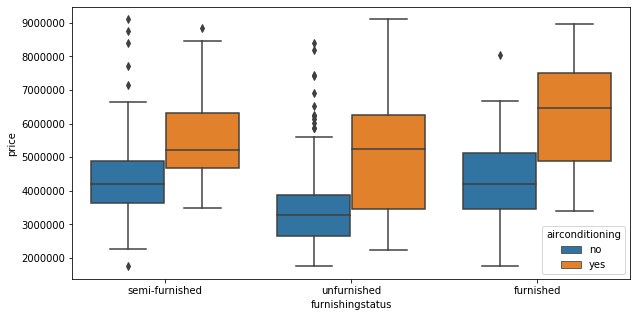

In [55]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)
plt.show()

In [56]:
# data preperation 

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [57]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [58]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
dummy1 = pd.get_dummies(data['furnishingstatus'])

In [59]:
dummy1.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [60]:
data=pd.concat([data,dummy1],axis=1)

In [61]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,1,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,1,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,0,1,0


In [62]:
# dropping furnishingstatus column 

data.drop(['furnishingstatus'],axis=1,inplace=True)

In [63]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1,0


In [64]:
# dividing dataset into dependent and independent variables 

X=data.drop(['price'],axis=1)
y=data['price']


In [65]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
15,6000,4,1,2,1,0,1,0,0,2,0,0,1,0
16,6600,4,2,2,1,1,1,0,1,1,1,0,0,1
17,8500,3,2,4,1,0,0,0,1,2,0,1,0,0
18,4600,3,2,2,1,1,0,0,1,2,0,1,0,0
19,6420,3,2,2,1,0,0,0,1,1,1,0,1,0


In [66]:
y.head()

15    9100000
16    9100000
17    8960000
18    8890000
19    8855000
Name: price, dtype: int64

In [67]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=100)


In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
y_pred = regressor.predict(X_test)

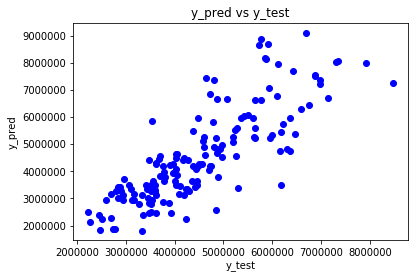

In [70]:
plt.scatter(y_pred, y_test, color = 'blue')
plt.title('y_pred vs y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [71]:
##price=0.35×area+0.20×bathrooms+0.19×stories+0.10×airconditioning+0.10×parking+0.11×prefarea